In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [6]:

df = pd.read_csv('results.csv')

Analizar la informacion para poder predecir los resultados de un partido de futbol , si es que tendra victoria , empete o perdera  

In [8]:
df.describe()

,home_score,away_score
count,41243.000000,41243.000000
mean,1.744975,1.189317
std,1.750513,1.406648
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [9]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [10]:
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [11]:
tournament_binary = {1:'Friendly', 2:'British Championship',3: 'Copa Lipton',4: 'Copa Newton',
      5: 'Copa Premio Honor Argentino',6: 'Copa Premio Honor Uruguayo',
      7: 'Copa Roca', 8:'Copa América', 9:'Copa Chevallier Boutell',
      10 :'Nordic Championship', 11:'International Cup', 12:'Baltic Cup',
     13 : 'Balkan Cup',14: 'FIFA World Cup', 15:'Copa Rio Branco',
      16: 'FIFA World Cup qualification', 17:'CCCF Championship',
       18:'NAFU Championship', 19:'Copa Oswaldo Cruz',
      20: 'Pan American Championship', 21:'Copa del Pacífico',
     22:  "Copa Bernardo O'Higgins",23: 'AFC Asian Cup qualification',
      24: 'Atlantic Cup', 25:'AFC Asian Cup', 26:'African Cup of Nations',
       27:'Copa Paz del Chaco',28: 'Merdeka Tournament',
     29:  'UEFA Euro qualification',30: 'UEFA Euro',
      31: 'Windward Islands Tournament',
      32: 'African Cup of Nations qualification',33: 'Vietnam Independence Cup',
      33: 'Copa Carlos Dittborn',34: 'CONCACAF Championship',
      35: 'Copa Juan Pinto Durán',36: 'UAFA Cup',37: 'South Pacific Games',
      38: 'CONCACAF Championship qualification',39: 'Copa Artigas',40: 'GaNEFo',
      41: "King's Cup",42: 'Gulf Cup',43: 'Indonesia Tournament',44: 'Korea Cup',
      45: 'Brazil Independence Cup',46: 'Copa Ramón Castilla',
      47: 'Oceania Nations Cup',48: 'CECAFA Cup',49: 'Copa Félix Bogado',
      50: 'Kirin Cup',51: 'CFU Caribbean Cup qualification',
      52: 'CFU Caribbean Cup',53: 'Amílcar Cabral Cup',54: 'Mundialito',
      55: 'West African Cup',56: 'Nehru Cup',57: 'Merlion Cup',58: 'UDEAC Cup',
      59: 'Rous Cup', 60:'Lunar New Year Cup',61: 'Tournoi de France',
      62: 'Malta International Tournament',63: 'Island Games',64: 'Dynasty Cup',
      65: 'Intercontinental Cup',66: 'AFF Championship qualification',
      67: 'UEFA Nations League',68: 'CONCACAF Nations League qualifying',
      69: 'African Nations Championship qualifying',70: 'Atlantic Heritage Cup',
      71: 'Inter Games Football Tournament',72: 'CONCACAF Nations League'}

In [12]:
df.tournament_binary = df.tournament.map({1:'Friendly', 2:'British Championship',3: 'Copa Lipton',4: 'Copa Newton',
      5: 'Copa Premio Honor Argentino',6: 'Copa Premio Honor Uruguayo',
      7: 'Copa Roca', 8:'Copa América', 9:'Copa Chevallier Boutell',
      10 :'Nordic Championship', 11:'International Cup', 12:'Baltic Cup',
     13 : 'Balkan Cup',14: 'FIFA World Cup', 15:'Copa Rio Branco',
      16: 'FIFA World Cup qualification', 17:'CCCF Championship',
       18:'NAFU Championship', 19:'Copa Oswaldo Cruz',
      20: 'Pan American Championship', 21:'Copa del Pacífico',
     22:  "Copa Bernardo O'Higgins",23: 'AFC Asian Cup qualification',
      24: 'Atlantic Cup', 25:'AFC Asian Cup', 26:'African Cup of Nations',
       27:'Copa Paz del Chaco',28: 'Merdeka Tournament',
     29:  'UEFA Euro qualification',30: 'UEFA Euro',
      31: 'Windward Islands Tournament',
      32: 'African Cup of Nations qualification',33: 'Vietnam Independence Cup',
      33: 'Copa Carlos Dittborn',34: 'CONCACAF Championship',
      35: 'Copa Juan Pinto Durán',36: 'UAFA Cup',37: 'South Pacific Games',
      38: 'CONCACAF Championship qualification',39: 'Copa Artigas',40: 'GaNEFo',
      41: "King's Cup",42: 'Gulf Cup',43: 'Indonesia Tournament',44: 'Korea Cup',
      45: 'Brazil Independence Cup',46: 'Copa Ramón Castilla',
      47: 'Oceania Nations Cup',48: 'CECAFA Cup',49: 'Copa Félix Bogado',
      50: 'Kirin Cup',51: 'CFU Caribbean Cup qualification',
      52: 'CFU Caribbean Cup',53: 'Amílcar Cabral Cup',54: 'Mundialito',
      55: 'West African Cup',56: 'Nehru Cup',57: 'Merlion Cup',58: 'UDEAC Cup',
      59: 'Rous Cup', 60:'Lunar New Year Cup',61: 'Tournoi de France',
      62: 'Malta International Tournament',63: 'Island Games',64: 'Dynasty Cup',
      65: 'Intercontinental Cup',66: 'AFF Championship qualification',
      67: 'UEFA Nations League',68: 'CONCACAF Nations League qualifying',
      69: 'African Nations Championship qualifying',70: 'Atlantic Heritage Cup',
      71: 'Inter Games Football Tournament',72: 'CONCACAF Nations League'})

C:\Users\DELL\AppData\Local\Temp\ipykernel_11000\887640329.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.tournament_binary = df.tournament.map({1:'Friendly', 2:'British Championship',3: 'Copa Lipton',4: 'Copa Newton',


In [18]:
# Seleccionar características (puntuaciones de los equipos)
#,'city', 'country','neutral'
X = df[['home_score', 'away_score']]
y = df[['tournament']]


In [16]:
X.head()

,home_score,away_score
0,0,0
1,4,2
2,2,1
3,2,2
4,3,0


In [19]:
y.head()

,tournament
0,Friendly
1,Friendly
2,Friendly
3,Friendly
4,Friendly


In [21]:
# Crear un modelo de Random Forest Classifier
forest = RandomForestClassifier()


In [22]:
# Entrenar el modelo en los datos de entrenamiento
forest.fit(X, y)

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

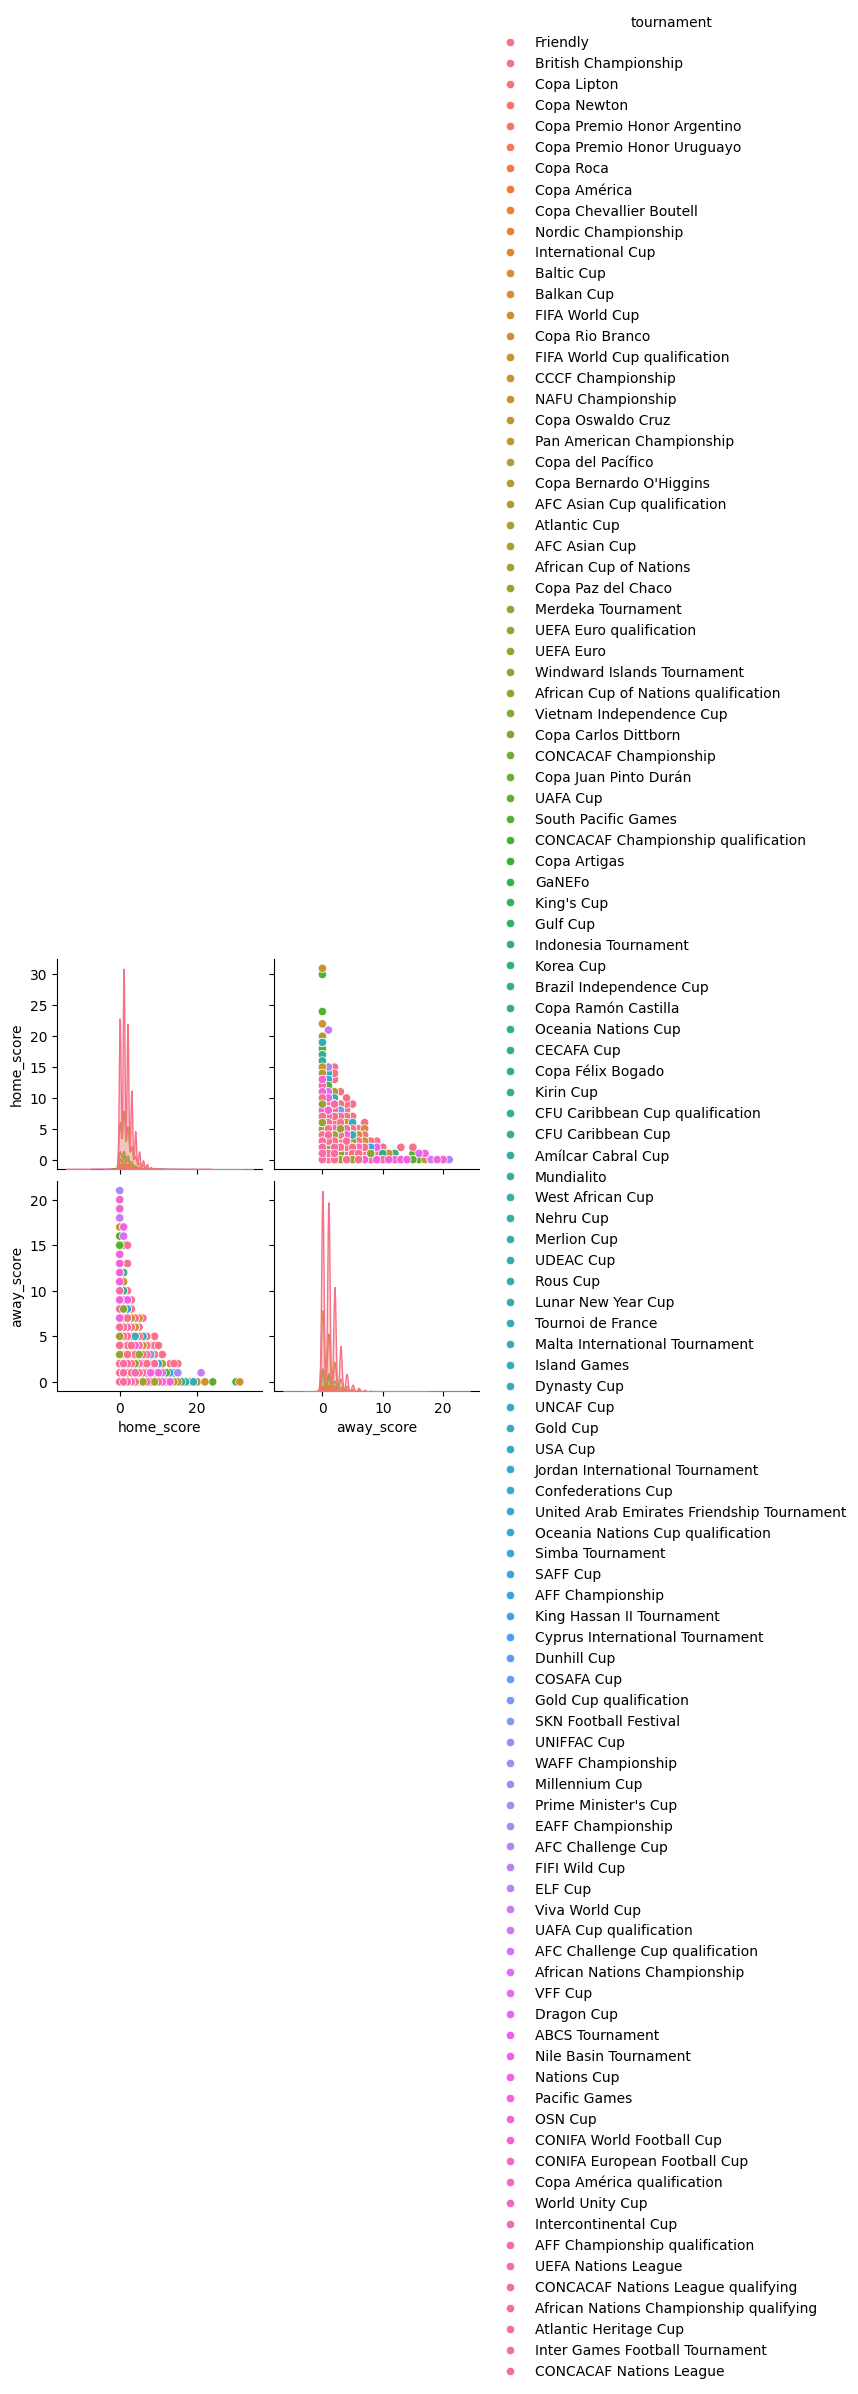

In [23]:

# Puedes utilizar seaborn para visualizar tus datos si es necesario
sns.pairplot(df[['home_score', 'away_score', 'tournament']], hue='tournament')

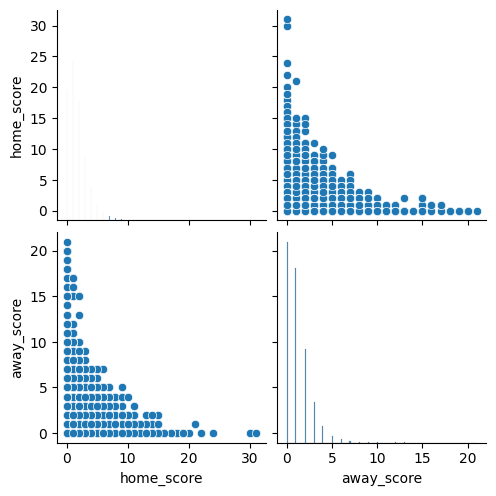

In [24]:
sns.pairplot(X)

In [25]:
print(f'El score del modelo es: {round(forest.score(X, y), 4) *100}%')

El score del modelo es: 41.4%
